# K-means

## Introducción
En este proyecto analizaremos el set de datos del top 50 canciones del 2020 en Spotify, para posteriormente ser agrupadas en dos grupos a través del algoritmo K-means. Esto con el objetivo de determinar si hay algún factor común entre las canciones más escuchadas de dicho año y con ello hacer las conclusiones y recomendaciones pertinentes.

## Datos
Los datos utilizados para este proyecto se extrajeron de la base de datos llamada Spotify Top 2020 Songs del sitio https://www.kaggle.com/.

Los atributos extraídos fueron los siguientes:
* Top Genre - género de la canción
* Año - Año de lanzamiento de la canción
* BPM - Beats Per Minute - El tempo de la canción.
* Duración (seg) - La duración de la canción en segundos.
* Popularidad - Cuanto mayor sea el valor, más popular será la canción.

## Metodología

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans

In [54]:
if __name__ == '__main__':

    dataset = pd.read_csv('TopSongs.csv') #Ubicación de archivo fuente
    x = dataset.drop(['title','artist','top genre'], axis=1 )
    
    
    kmeans = KMeans(n_clusters=2, random_state=1).fit(x) #Usar n_clusters para el númer de grupos deseados, random_state se define con cualquier número para asegurar los mismos resultados
    print('='*64) #Esta línea es solo para estética de impresión en terminal
    print('Total de grupos:', len(kmeans.cluster_centers_))
    print('='*64)
    dataset['grupo'] = kmeans.predict(x) #Nombre de la nueva columna donde pondremos nuestra predicción de algoritmo
    dataset.to_csv('groups.csv', index=False, header=True) #Creación de archivo en carpeta destino

    grouped_df = dataset.groupby(['grupo']) 

    for key, group in grouped_df:  #Muestra cada grupo
        print(grouped_df.get_group(key), "\n\n", '='*180)  

    print('El Archivo "groups.csv" ha sido creado con éxito en la carpeta "out".')


Total de grupos: 2
    sel                              title           artist  \
0     1                    Blinding Lights       The Weeknd   
5     6                            Circles      Post Malone   
6     7                         goosebumps     Travis Scott   
7     8                       Lucid Dreams       Juice WRLD   
12   13                      Before You Go    Lewis Capaldi   
15   16        Godzilla (feat. Juice WRLD)           Eminem   
16   17  Stuck with U (with Justin Bieber)    Ariana Grande   
17   18                         SICKO MODE     Travis Scott   
22   23                everything i wanted    Billie Eilish   
24   25                             Say So         Doja Cat   
32   33                     Break My Heart         Dua Lipa   
33   34                              Hawái           Maluma   
36   37                            Safaera        Bad Bunny   
39   40           Intentions (feat. Quavo)    Justin Bieber   
44   45         Life Is Good (feat. 

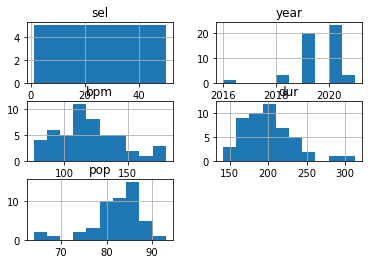

In [55]:
dataset.drop(['grupo'],1).hist()
plt.show()

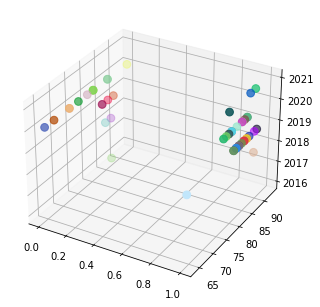

In [56]:
from random import randint
X = np.array(dataset[["grupo","pop","year"]])
y = np.array(dataset['pop'])
X.shape
fig = plt.figure()
ax = Axes3D(fig)
asignar=[]
for row in y:
    asignar.append('#%06X' % randint(0, 0xFFFFFF))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

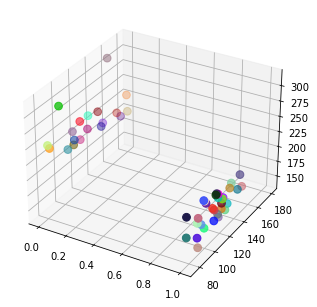

In [70]:
X = np.array(dataset[["grupo","bpm","dur"]])
y = np.array(dataset['pop'])
X.shape
fig = plt.figure()
ax = Axes3D(fig)
asignar=[]
for row in y:
    asignar.append('#%06X' % randint(0, 0xFFFFFF))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

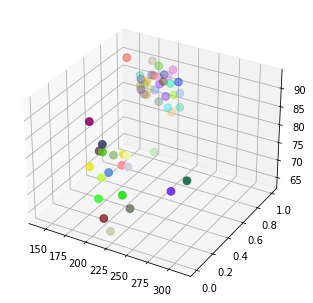

In [69]:
X = np.array(dataset[["dur","grupo","pop"]])
y = np.array(dataset['pop'])
X.shape
fig = plt.figure()
ax = Axes3D(fig)
asignar=[]
for row in y:
    asignar.append('#%06X' % randint(0, 0xFFFFFF))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

## Conclusiones
Se concluye que en promedio las canciones más populares en Spotify el 2020 son de años anteriores al mismo, entre el 2018 y 2019. La clasificación se realizó tomando en cuenta principalmente la duración de las canciones, estando en el primer grupo las canciones más largas, todas estas mayores a los 200 segundos. Además, podemos observar que se concentran canciones con mejor calificación en el segundo grupo.

## Recomendaciones
En promedio en el 2020 las canciones con mayor popularidad eran aquellas que rondeaban los 180 segundo de duración. Por ello se recomienda mantenerse entre los 3 minutos de canción para que esta sea más popular, ya que las que pasaban de este tiempo o eran demasiado cortas no fueron tan populares como las demás.

## Referencias
https://www.kaggle.com/heminp16/spotify-top-2020-songs